# analyze H1: Does including Literals affect embedding pefromance?

In [56]:
os.listdir('../data/predicted/')

['dmg777k+bin_numbers2-num_bins@10$RDF2Vec$KNN$0.csv',
 'dmg777k+bin_numbers2-num_bins@10$RDF2Vec$KNN$1.csv',
 'dmg777k+bin_numbers2-num_bins@10$RDF2Vec$SVM$0.csv',
 'dmg777k+bin_numbers2-num_bins@10$RDF2Vec$SVM$1.csv',
 'dmg777k+bin_numbers2-num_bins@10$TransE$KNN$0.csv',
 'dmg777k+bin_numbers2-num_bins@10$TransE$KNN$1.csv',
 'dmg777k+bin_numbers2-num_bins@10$TransE$KNN$2.csv',
 'dmg777k+bin_numbers2-num_bins@10$TransE$SVM$0.csv',
 'dmg777k+bin_numbers2-num_bins@10$TransE$SVM$1.csv',
 'dmg777k+bin_numbers2-num_bins@10$TransE$SVM$2.csv',
 'dmg777k+bin_numbers2-num_bins@10+delete_all_literals-neighborhood@1$RDF2Vec2$KNN$0.csv',
 'dmg777k+bin_numbers2-num_bins@10+delete_all_literals-neighborhood@1$RDF2Vec2$KNN$1.csv',
 'dmg777k+bin_numbers2-num_bins@10+delete_all_literals-neighborhood@1$RDF2Vec2$SVM$0.csv',
 'dmg777k+bin_numbers2-num_bins@10+delete_all_literals-neighborhood@1$RDF2Vec2$SVM$1.csv',
 'dmg777k+delete_all_literals-neighborhood@1$RDF2Vec$KNN$0.csv',
 'dmg777k+delete_all_litera

In [57]:
import os
import numpy as np
import re
entries = {}
for entry in os.listdir('../data/predicted/'):
    if re.sub(r'\$[0-9]+\.csv','',entry) not in entries:
        entries[re.sub(r'\$[0-9]+\.csv','',entry)] = []
    #if entry.split('+')[0]=='dmg777k':
    entries[re.sub(r'\$[0-9]+\.csv','',entry)].append(np.loadtxt(f'../data/predicted/{entry}', dtype=np.int32, delimiter=','))

    
    #np.loadtxt(entry,delimiter=',',fmt="%s")
    #entry.replac
#predictions = {}
#np.loadtxt()

In [58]:
split_by_embedder = {}
for key in entries.keys():
    #subsplit_by_evaluation = {}
    if key.split('$')[1] not in  split_by_embedder:
        split_by_embedder[key.split('$')[1]] = {}
    if key.split('$')[-1] not in split_by_embedder[key.split('$')[1]]:
        split_by_embedder[key.split('$')[1]][key.split('$')[-1]] = {}
    split_by_embedder[key.split('$')[1]][key.split('$')[-1]][key] = entries[key]


In [63]:
split_by_embedder['RDF2Vec2']

{'KNN': {'dmg777k+bin_numbers2-num_bins@10+delete_all_literals-neighborhood@1$RDF2Vec2$KNN': [array([[4, 4, 1, ..., 1, 1, 1],
          [1, 1, 1, ..., 4, 1, 1]]),
   array([[3, 1, 1, ..., 4, 1, 1],
          [1, 1, 1, ..., 4, 1, 1]])],
  'dmg777k+delete_all_literals-neighborhood@1$RDF2Vec2$KNN': [array([[3, 1, 1, ..., 3, 1, 1],
          [1, 1, 1, ..., 4, 1, 1]]),
   array([[3, 1, 1, ..., 4, 2, 1],
          [1, 1, 1, ..., 4, 1, 1]])],
  'dmg777k+do_nothing-nothingness@True$RDF2Vec2$KNN': [array([[3, 1, 1, ..., 1, 1, 1],
          [1, 1, 1, ..., 4, 1, 1]]),
   array([[3, 4, 1, ..., 1, 4, 1],
          [1, 1, 1, ..., 4, 1, 1]])]},
 'SVM': {'dmg777k+bin_numbers2-num_bins@10+delete_all_literals-neighborhood@1$RDF2Vec2$SVM': [array([[4, 4, 1, ..., 1, 4, 1],
          [1, 1, 1, ..., 4, 1, 1]]),
   array([[4, 1, 1, ..., 4, 4, 1],
          [1, 1, 1, ..., 4, 1, 1]])],
  'dmg777k+delete_all_literals-neighborhood@1$RDF2Vec2$SVM': [array([[4, 1, 1, ..., 3, 4, 1],
          [1, 1, 1, ..., 4, 1, 1

In [64]:
"dmg777k+bin_numbers2-num_bins@10+delete_all_literals-neighborhood@1$RDF2Vec2$SVM".split('$')[0].split('+')[1].split('-')[0]


'bin_numbers2'

RDF2Vec
KNN
dmg777k+bin_numbers2-num_bins@10
micro 0.5824587706146926
macro 0.3664504819140491
dmg777k+delete_all_literals-neighborhood@1
micro 0.5762118940529735
macro 0.38395088277732914
dmg777k+do_nothing-nothingness@True
micro 0.5797101449275361
macro 0.35253580526969625
RDF2Vec  | KNN
['bin_numbers2', 'delete_all_literals', 'do_nothing']
[0.5824587706146926, 0.5762118940529735, 0.5797101449275361]
SVM
dmg777k+bin_numbers2-num_bins@10
micro 0.6309345327336331
macro 0.5339238795844397
dmg777k+delete_all_literals-neighborhood@1
micro 0.5792103948025987
macro 0.5039452484267519
dmg777k+do_nothing-nothingness@True
micro 0.6215225720473097
macro 0.5225414990886659
RDF2Vec  | SVM
['bin_numbers2', 'delete_all_literals', 'do_nothing']
[0.6309345327336331, 0.5792103948025987, 0.6215225720473097]
TransE
KNN
dmg777k+bin_numbers2-num_bins@10
micro 0.49275362318840576
macro 0.24606247024639252
dmg777k+delete_all_literals-neighborhood@1
micro 0.4567716141929036
macro 0.198381864080778
dmg777k+do

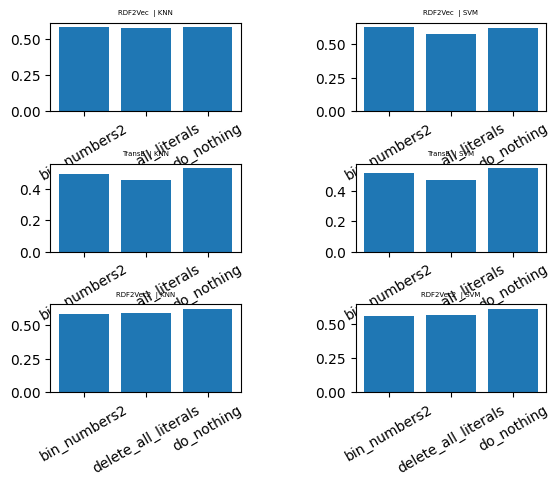

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(split_by_embedder.keys()),len(split_by_embedder[list(split_by_embedder.keys())[0]]))



plt.subplots_adjust(wspace=0.6, hspace=0.6)
#plt.xticks(rotation = 45)
plt.xticks(rotation=70)

#fig.suptitle('Vertically stacked subplots')

i = 0
for ki,vi in split_by_embedder.items():
    
    j=0
    print(ki)
    for kk, vk in vi.items():
        print(kk)  
        f1mig = []
        f1mig_label = []
        f1mag =  [] 
        f1mag_label = [] 
        for kj,vj in vk.items():
        
            print(kj.split('$')[0])
            f1mi = []
            
            f1ma = []
            
            for scores in vj:
                f1mi.append(f1_score(scores[0],scores[1], average="micro"))
                f1ma.append(f1_score(scores[0],scores[1], average="macro"))
            f1mig.append(np.average(f1mi))
            f1mig_label.append(kj.split('$')[0].split('+')[1].split('-')[0])
            f1mag.append(np.average(f1ma))
            print(f'micro {np.average(f1mi)}')
            print(f'macro {np.average(f1ma)}')
        print(f'{ki}  | {kk}')
        print(f1mig_label)
        print(f1mig)
        axs[i][j].bar(f1mig_label,f1mig)
        axs[i][j].set_title(f'{ki}  | {kk}', fontsize="5")
        axs[i][j].tick_params(axis='x', rotation=30)
        j+=1
    i+=1
#plt.xticks(rotation = 45)
#plt.show()
        #f1_score(test_taget, predictions, average="micro")} macro {f1_score(test_taget, predictions, average="macro")}

In [ ]:
import re
re.sub(r'\$[0-9]+\.csv','',os.listdir('../data/predicted/')[0])
#os.listdir('../data/predicted/')[0].find(r'\$[0-9]+\.csv')

'dmg777k+bin_numbers2-num_bins@10$RDF2Vec$KNN'

In [ ]:
os.listdir('../data/predicted/')[0]

'dmg777k+bin_numbers2-num_bins@10$RDF2Vec$KNN$0.csv'

In [ ]:
np.loadtxt(f'../data/predicted/{os.listdir("../data/predicted/")[0]}', dtype=np.int32, delimiter=',')

array([[1, 1, 3, ..., 1, 1, 1],
       [1, 1, 1, ..., 4, 1, 1]])

# dataframe method

In [11]:
import os
import numpy as np
import re
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

#df = pd. 

print('pykeen file does not exist. Writing pykeen file...')
df = pd.DataFrame(columns=["full_name","f1_macro","f1_micro"])
        
dfs = []
i = 0
for entry in os.listdir('../data/predicted/'):
    results = np.loadtxt(f'../data/predicted/{entry}', dtype=np.int32, delimiter=',')
    i+=1
    dfs.append(pd.DataFrame(
        [[
            entry,
            f1_score(results[0],results[1],average='micro'),
            f1_score(results[0],results[1],average='macro'),
        ]],
        columns=["full_name","f1_macro","f1_micro"]
    ))
print(i)

df = pd.concat(dfs,ignore_index=True)
print(len(df))
df['base_name']= df['full_name'].str.extract(r'(.*)\$[0-9]+\.csv')
df = df.groupby('base_name').mean().round(3)
#df['name'] = df.index
df = df.reset_index()
df['dataset']= df['base_name'].str.extract(r'(.*?)\+.*')
df['eval_method']= df['base_name'].str.extract(r'.*\$([A-Z]+)')
df['steps'] = df['base_name'].str.findall(r'\+(.*?)-')
df['steps'] = [', '.join(map(str, l)) for l in df['steps']]
df['embedder'] = df['base_name'].str.extract(r'\$(.*?)\$')
df = df.drop(columns='base_name')

#entries = {}
#for entry in os.listdir('../data/predicted/'):
#    if re.sub(r'\$[0-9]+\.csv','',entry) not in entries:
#        entries[re.sub(r'\$[0-9]+\.csv','',entry)] = []
    #if entry.split('+')[0]=='dmg777k':
#    entries[re.sub(r'\$[0-9]+\.csv','',entry)].append(np.loadtxt(f'../data/predicted/{entry}', dtype=np.int32, delimiter=','))

pykeen file does not exist. Writing pykeen file...
280
280


In [12]:
len(dfs)

280

In [13]:
df[df['steps']=='one_entity, delete_all_literals']

,full_name,f1_macro,f1_micro,dataset,eval_method,steps,embedder
38,amplus+one_entity-num_bins@1+delete_all_litera...,0.497400,0.281474,amplus,KNN,"one_entity, delete_all_literals",RDF2Vec2
39,amplus+one_entity-num_bins@1+delete_all_litera...,0.494300,0.277523,amplus,KNN,"one_entity, delete_all_literals",RDF2Vec2
40,amplus+one_entity-num_bins@1+delete_all_litera...,0.494450,0.274992,amplus,KNN,"one_entity, delete_all_literals",RDF2Vec2
41,amplus+one_entity-num_bins@1+delete_all_litera...,0.495300,0.292209,amplus,KNN,"one_entity, delete_all_literals",RDF2Vec2
42,amplus+one_entity-num_bins@1+delete_all_litera...,0.494450,0.305861,amplus,KNN,"one_entity, delete_all_literals",RDF2Vec2
43,amplus+one_entity-num_bins@1+delete_all_litera...,0.496200,0.282684,amplus,KNN,"one_entity, delete_all_literals",RDF2Vec2
44,amplus+one_entity-num_bins@1+delete_all_litera...,0.475150,0.247809,amplus,SVM,"one_entity, delete_all_literals",RDF2Vec2
45,amplus+one_entity-num_bins@1+delete_all_litera...,0.448500,0.237867,amplus,SVM,"one_entity, delete_all_literals",RDF2Vec2
46,amplus+one_entity-num_bins@1+delete_all_litera...,0.445600,0.223527,amplus,SVM,"one_entity, delete_all_literals",RDF2Vec2
47,amplus+one_entity-num_bins@1+delete_all_litera...,0.449400,0.237610,amplus,SVM,"one_entity, delete_all_literals",RDF2Vec2


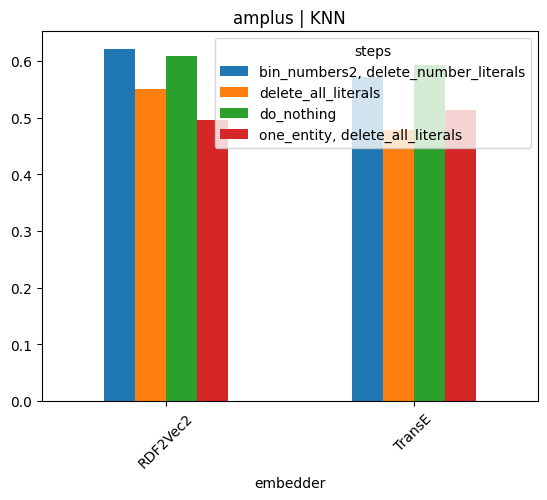

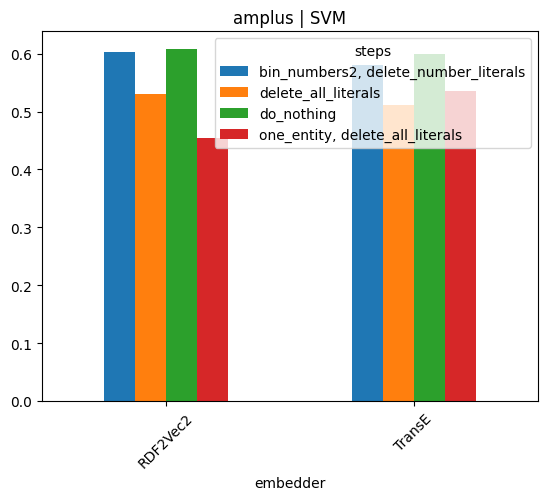

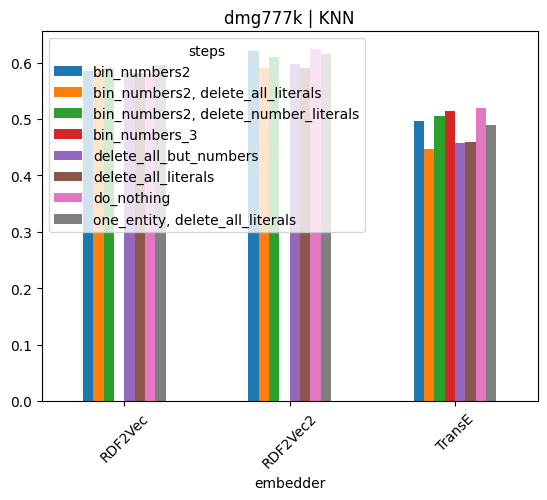

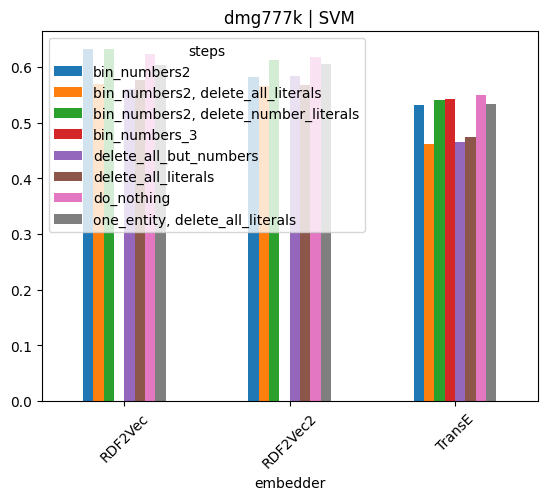

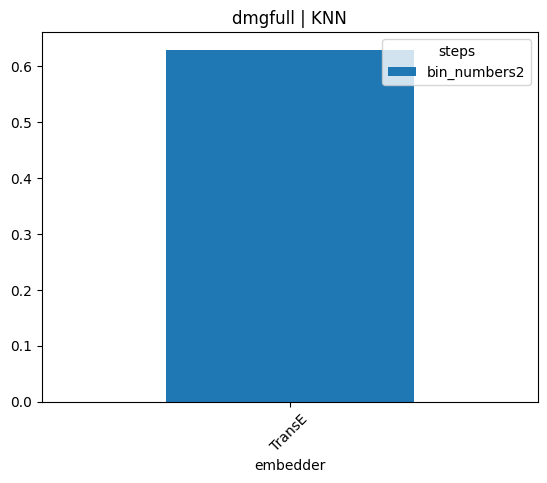

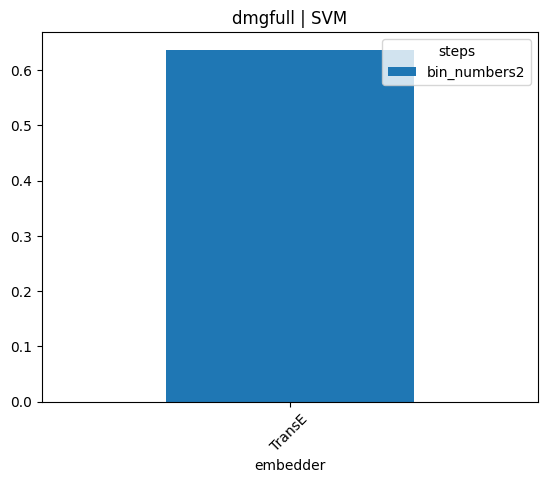

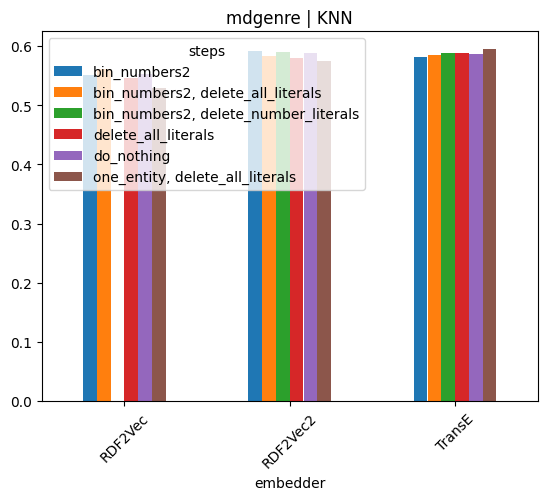

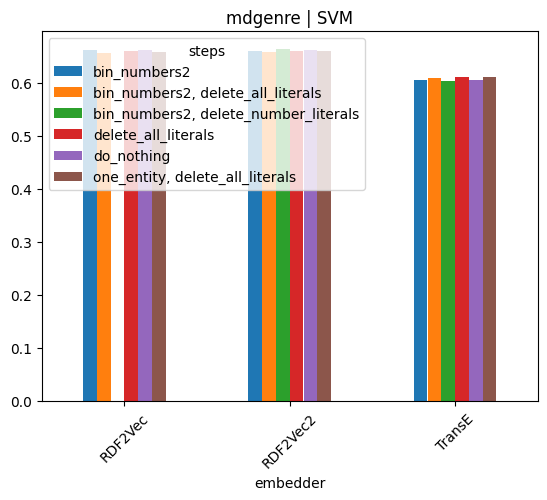

In [10]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) ],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation}')

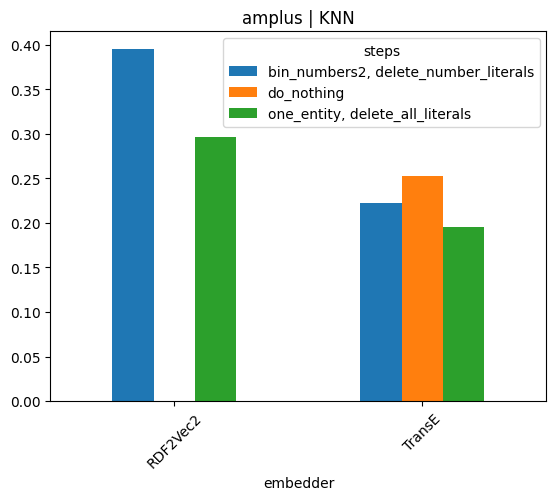

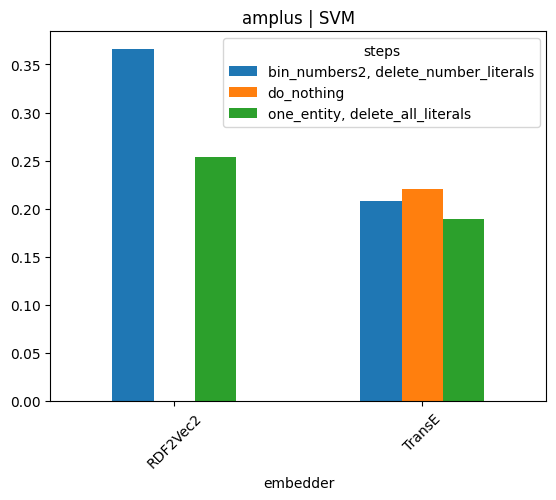

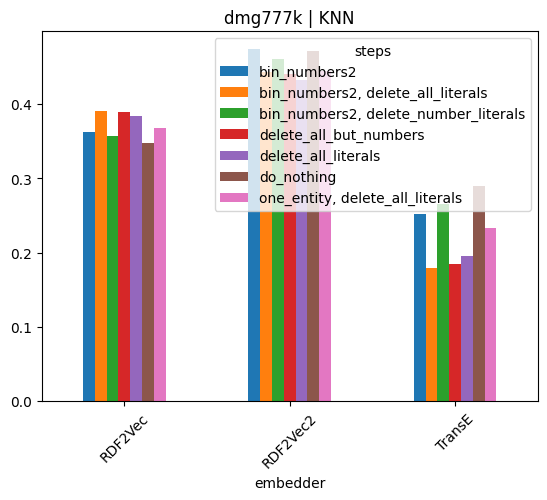

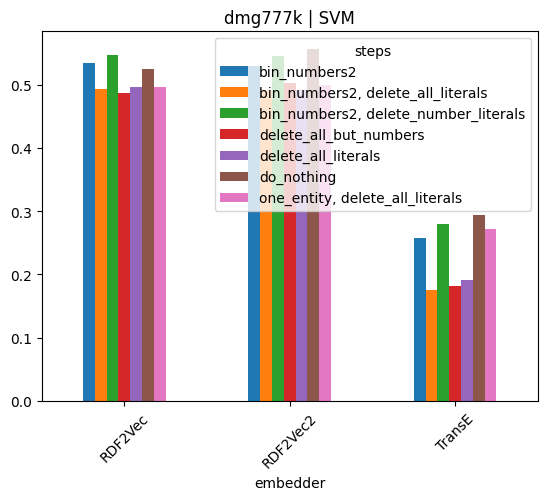

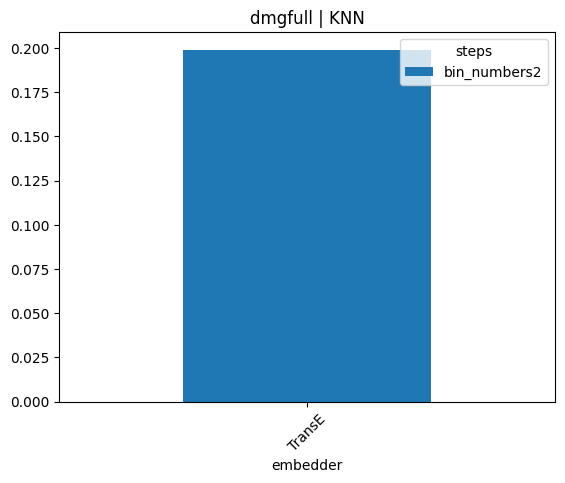

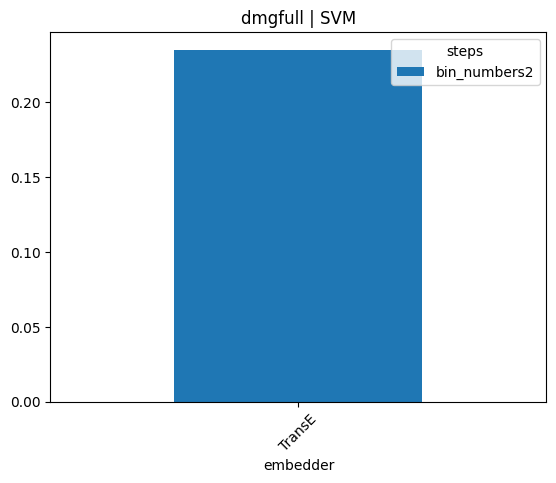

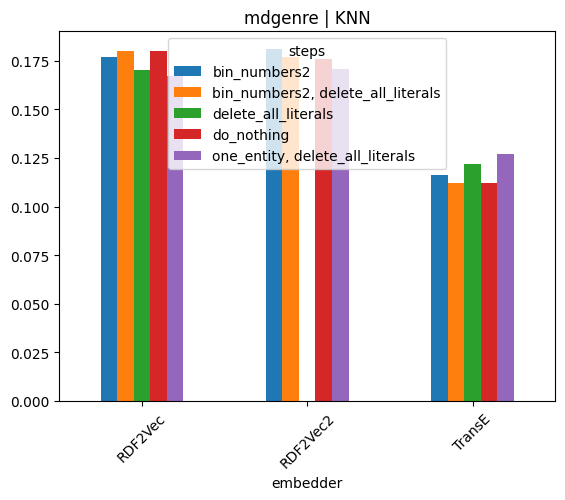

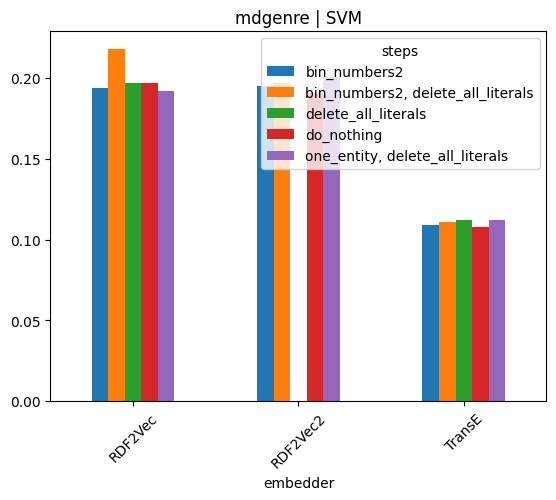

In [19]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) ],
               index='embedder', columns=['steps'],values='f1_micro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation}')

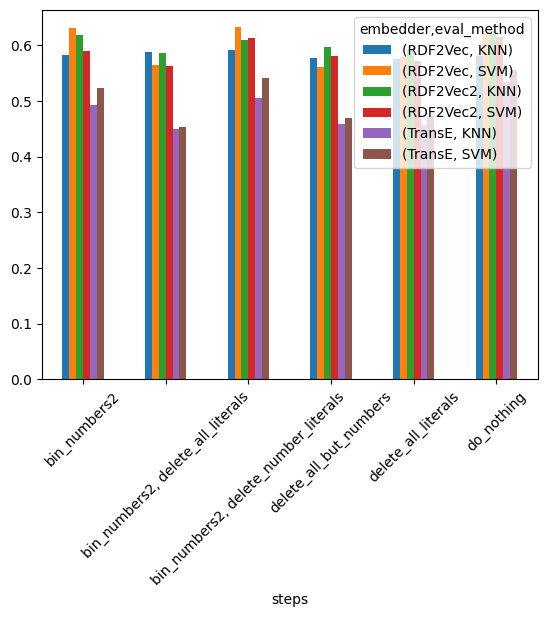

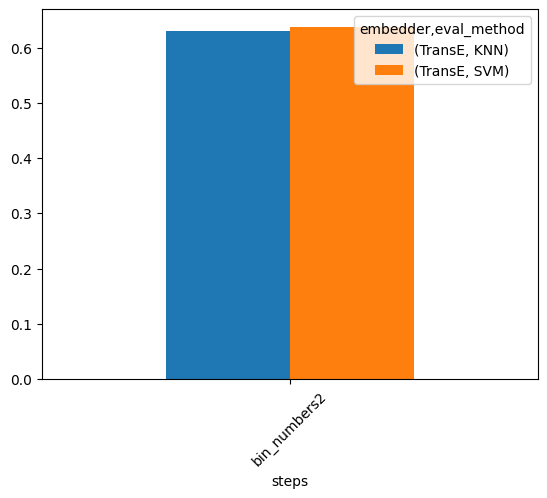

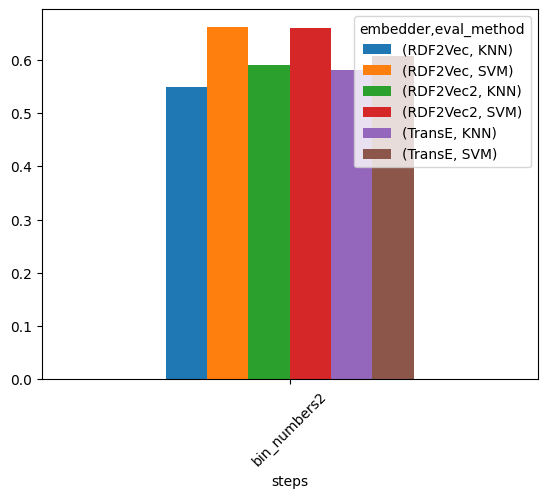

In [23]:
for dataset in df['dataset'].unique():
    pd.pivot_table(df[df['dataset']==dataset],
               index='steps', columns=['embedder','eval_method'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar')

#.groupby(['embedder','eval_method']).plot(x='steps',y='f1_macro',kind='line',subplots=True)

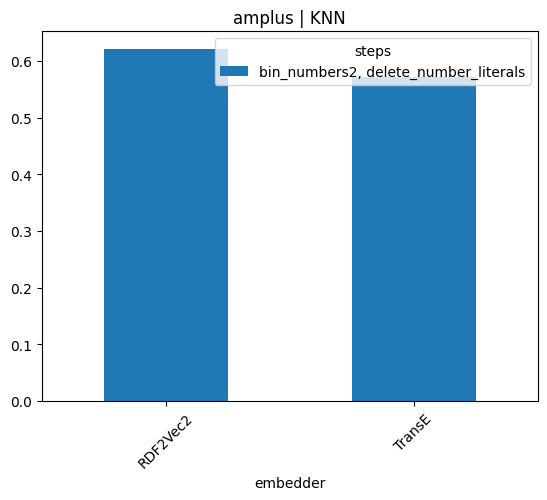

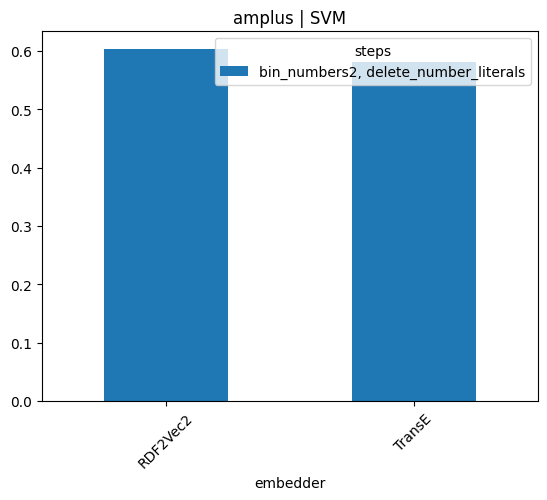

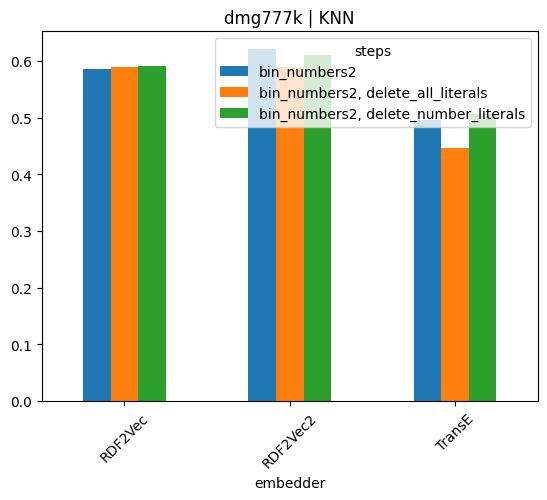

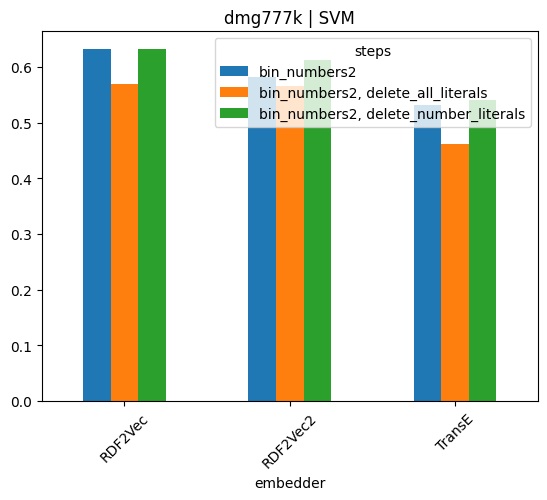

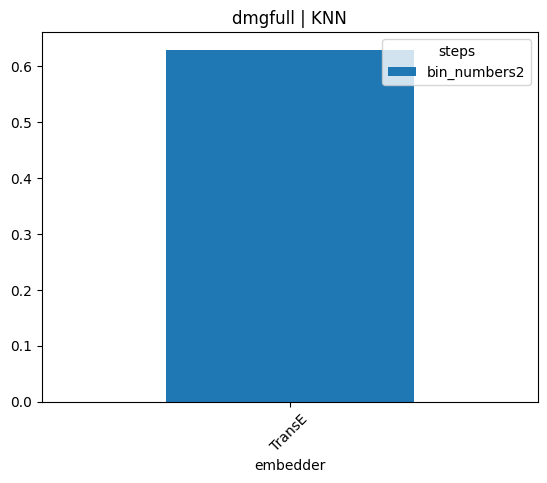

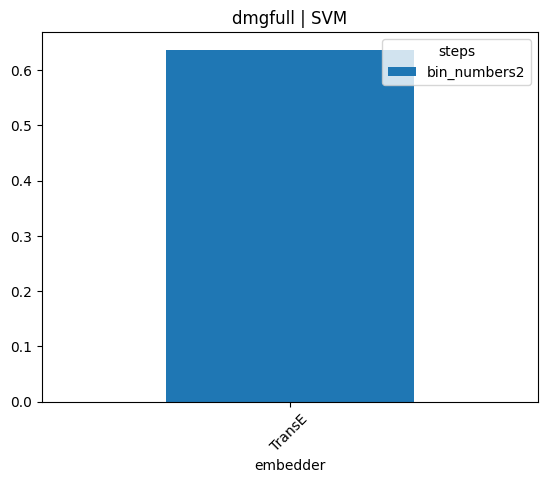

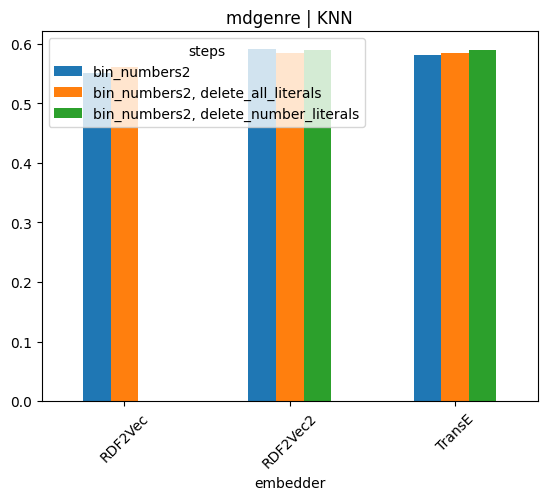

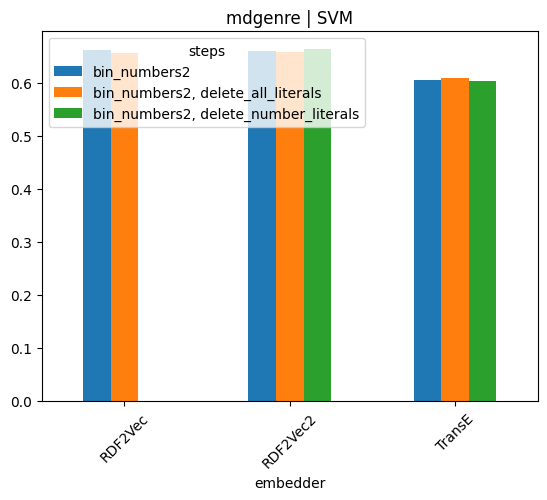

In [7]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) &  (df['steps'].str.match(r'bin_numbers.*'))],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation}')

In [6]:
df

,f1_macro,f1_micro,dataset,eval_method,steps,embedder
0,0.621,0.389,amplus,KNN,"bin_numbers2, delete_number_literals",RDF2Vec2
1,0.603,0.367,amplus,SVM,"bin_numbers2, delete_number_literals",RDF2Vec2
2,0.571,0.218,amplus,KNN,"bin_numbers2, delete_number_literals",TransE
3,0.581,0.206,amplus,SVM,"bin_numbers2, delete_number_literals",TransE
4,0.551,0.325,amplus,KNN,delete_all_literals,RDF2Vec2
...,...,...,...,...,...,...
89,0.659,0.192,mdgenre,SVM,"one_entity, delete_all_literals",RDF2Vec
90,0.575,0.171,mdgenre,KNN,"one_entity, delete_all_literals",RDF2Vec2
91,0.660,0.201,mdgenre,SVM,"one_entity, delete_all_literals",RDF2Vec2
92,0.595,0.127,mdgenre,KNN,"one_entity, delete_all_literals",TransE
